## Loading the Data:

In this tutorial, we will be looking at a [breast cancer dataset provided with the sci-kit learn package](https://scikit-learn.org/stable/datasets/toy_dataset.html).

In [3]:
datasets

<module 'sklearn.datasets' from '/Users/ac4919/miniforge3/envs/ml4n/lib/python3.11/site-packages/sklearn/datasets/__init__.py'>

In [4]:
# loading the dataset
bc_data = datasets.load_breast_cancer(as_frame=True)

In [5]:
# accessing the data or the target from the dataset loaded above
bc_features = bc_data.data
bc_target = bc_data.target

The first 5 lines of this data look as follows:

In [6]:
bc_features.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


And the targets are as follows (where 0 = Malignant and 1 = Benign):

In [7]:
bc_target.value_counts()

target
1    357
0    212
Name: count, dtype: int64

We will cut the dataset to the mean features to make thing slightly easier:

In [8]:
bc_mean_features = bc_features[
    ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
    'mean smoothness', 'mean compactness', 'mean concavity',
    'mean concave points', 'mean symmetry', 'mean fractal dimension']
    ]

We can use [TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) to visualise the data in two dimensions:

/var/folders/dn/w2011ntd5gxf26dgf_38535m0000gp/T/ipykernel_10860/3504014926.py:35: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


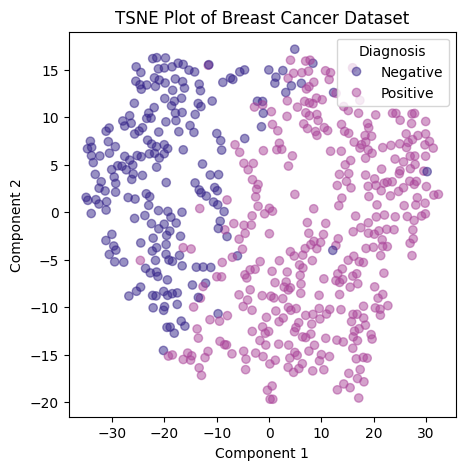

In [9]:
# import TSNE
from sklearn.manifold import TSNE

# pre-processing the data
scaler = StandardScaler()
tsne = TSNE(n_components=2, learning_rate='auto', init='random', random_state=random_state.next())
x = tsne.fit_transform(scaler.fit_transform(bc_mean_features))

# setting the figure
fig, ax = plt.subplots(1,1,figsize=(5,5))

# plotting the data
scatter = ax.scatter(
    x=x[:,0], 
    y=x[:,1], 
    c=bc_target.astype(bool), 
    alpha=0.5, 
    cmap=binary_cmap,
    )

# adding the legend
ax.legend(
    scatter.legend_elements(num=1)[0],
    ['Negative', 'Positive'],
    loc="upper right", 
    title="Diagnosis",
    )

# set title and labels
ax.set_title('TSNE Plot of Breast Cancer Dataset')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')

# showing plot
fig.show()

The values of the features are distributed as follows:

Here are the train and test splits of a **synthetic** dataset made using [make_moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html):

In [14]:
# make synthetic dataset
X, y = datasets.make_moons(1000, noise=0.15, random_state=random_state.next())

# train-test splits:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.75, random_state=random_state.next()
    )

In [15]:
# scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/var/folders/dn/w2011ntd5gxf26dgf_38535m0000gp/T/ipykernel_10860/4104690370.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


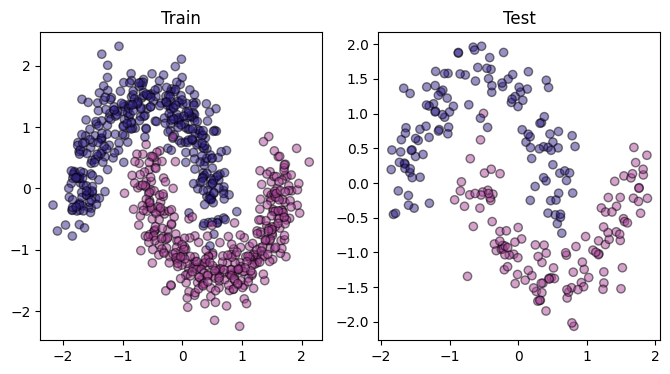

In [16]:
# plot the train and test splits for the synthetic data
fig, axes = plt.subplots(1,2,figsize=(8,4))
ax1, ax2 = axes

ax1.scatter(x=X_train[:,0], y=X_train[:,1], c=y_train, alpha=0.5, cmap=binary_cmap, edgecolor='black')
ax2.scatter(x=X_test[:,0], y=X_test[:,1], c=y_test, alpha=0.5, cmap=binary_cmap, edgecolor='black')

ax1.set_title('Train')
ax2.set_title('Test')

fig.show()

The model can be fit as follows:

In [17]:
# start with linear kernel
svc = SVC(kernel='linear', random_state=random_state.next())

In [18]:
svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=745137746)

Let's evaluate the model and see how well its decision boundary fit the data:

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
print(f"The accuracy is {accuracy_score(y_test, svc.predict(X_test))*100}%")

The accuracy is 86.0%


This doesn't fit the data correctly, we can see that the linear kernel is not designed for this dataset. In the following, we will try many different kernels:

/var/folders/dn/w2011ntd5gxf26dgf_38535m0000gp/T/ipykernel_10860/3411990512.py:39: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


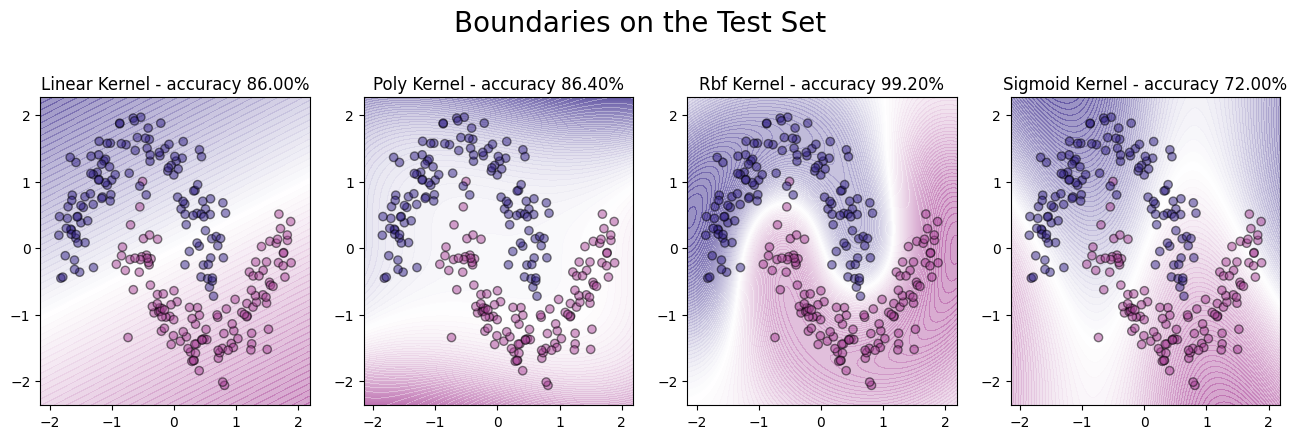

In [22]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

fig, axes = plt.subplots(1,len(kernels),figsize=(len(kernels)*4,4))

# looping over kernels
for nk, kernel in enumerate(kernels):
    ax = np.ravel(axes)[nk] # getting the current axis

    # fitting the model
    svc = SVC(kernel=kernel, random_state=random_state.next())
    svc.fit(X_train, y_train)

    # plotting the decision boundary
    dbd = DecisionBoundaryDisplay.from_estimator(
        estimator=svc,
        X=X_test,
        grid_resolution=200,
        plot_method='contourf',
        response_method='decision_function',
        ax=ax,
        cmap=binary_cmap,
        alpha=0.5,
        eps=0.3,
        levels=100,
        )
    
    # plotting the data
    ax.scatter(
        x=X_test[:,0], y=X_test[:,1], c=y_test, 
        alpha=0.5, cmap=binary_cmap, edgecolor='black'
        )

    # title
    ax.set_title(f'{kernel.title()} Kernel - '\
        f'accuracy {accuracy_score(y_test, svc.predict(X_test))*100:.2f}%')

# figure title
fig.suptitle('Boundaries on the Test Set', fontsize=20, y=1.1)
fig.show()

Clearly, in this example, the RBF kernel was the best!

But in which cases are the different kernels better?

In [23]:
# generating more synthetic datasets
data_dict = {
    'moons': datasets.make_moons(
        1000, noise=0.15, random_state=random_state.next()
        ),
    'circles': datasets.make_circles(
        1000, noise=0.15, factor=0.2, random_state=random_state.next()
        ),
    'blobs': datasets.make_blobs(
        1000, centers=[[1, -1], [1, 1]], cluster_std=0.3, random_state=random_state.next(),
        ),
    }

In [24]:
# kernel names
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

/var/folders/dn/w2011ntd5gxf26dgf_38535m0000gp/T/ipykernel_10860/1929791253.py:57: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


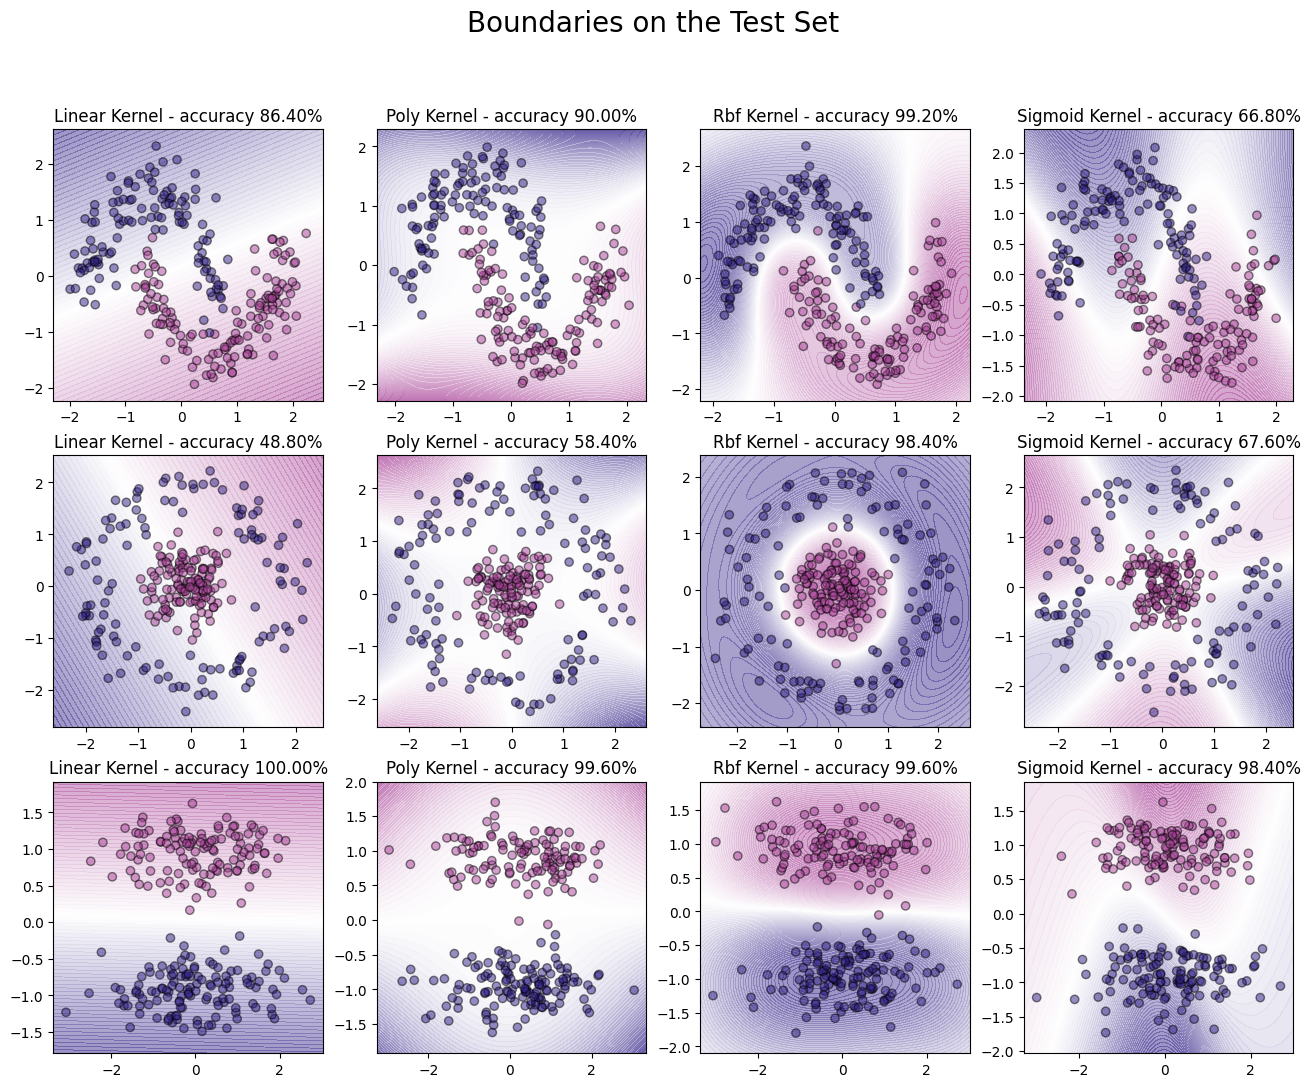

In [25]:
# plotting figure
fig, axes = plt.subplots(
    len(data_dict), len(kernels), figsize=(len(kernels)*4,len(data_dict)*4),
    )

# looping over kernels
for nd, data in enumerate(data_dict):
    for nk, kernel in enumerate(kernels):
        
        # getting the current axis
        ax = axes[nd, nk]

        # getting the data
        X, y = data_dict[data]

        # train-test splits:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, train_size=0.75, random_state=random_state.next()
            )

        # scaling the data
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        # fitting the model
        svc = SVC(kernel=kernel, random_state=random_state.next())
        svc.fit(X_train, y_train)

        # plotting the decision boundary
        dbd = DecisionBoundaryDisplay.from_estimator(
            estimator=svc,
            X=X_test,
            grid_resolution=200,
            plot_method='contourf',
            response_method='decision_function',
            ax=ax,
            cmap=binary_cmap,
            alpha=0.5,
            eps=0.3,
            levels=100,
            )
        
        # plotting the data
        ax.scatter(
            x=X_test[:,0], y=X_test[:,1], c=y_test, 
            alpha=0.5, cmap=binary_cmap, edgecolor='black'
            )

        # title
        ax.set_title(f'{kernel.title()} Kernel - '\
            f'accuracy {accuracy_score(y_test, svc.predict(X_test))*100:.2f}%')

# figure title
fig.suptitle('Boundaries on the Test Set', fontsize=20)
# showing plot
fig.show()